In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('../data/table.csv')
df.head()

,Paper,Host-DNA depletion,Microbial enrichment,Sequencing technology,Sequencing depth (Gbp),Tissue,Disease,Data public,Sample size (n),Bioinformatics tools,Fresh or frozen samples
0,2017,Yes,No,Illumina HiSeq 2500,X,Bone and joint,Bone and joint infections,No,47,"MetaPhlAn2, Kraken, Bowtie2",Frozen
1,2019,Yes,No,Illumina MiSeq,0.5,Aortic valve,Infective endocarditis,Yes,1,"CLARK, MetaPhlAn2, mothur, UBLAST",Frozen
2,2019,No,Yes,Illumina MiSeq,0.041,Aortic valve,Infective endocarditis,Yes,1,"CLARK, USEARCH, MetaPhlAn2, BWA, BLAST",Frozen
3,2019,No,No,Illumina MiSeq,?,Cerebrospinal fluid,Toscana virus,Yes,1,"TOSV, SmaltAlign, VirMet",Fresh
4,2019,No,No,Illumina GAIIx,0.07,Sputum,Polymicrobial infections,Yes,3,"SMALT, BLASTn",Frozen


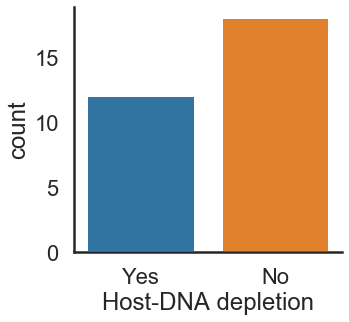

In [3]:
g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.catplot(x='Host-DNA depletion',kind="count",data=df)
g=sns.despine()

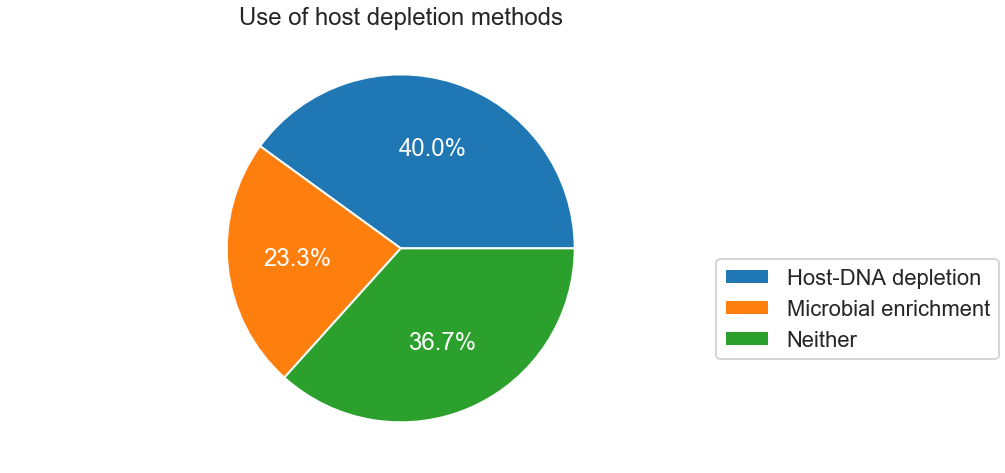

In [4]:
seq = pd.DataFrame({'ratio': [12, 7, 11]}, index=['Host-DNA depletion','Microbial enrichment', 'Neither'])
plot = seq.plot.pie(subplots=True, figsize=(8,8), autopct='%1.1f%%', textprops = {'color':"w"})
plt.legend(loc='best', bbox_to_anchor=(1.9, 0.5))
plt.ylabel("", color = "black")
plt.title("Use of host depletion methods")
plt.savefig('../figures/a.png',bbox_inches='tight')

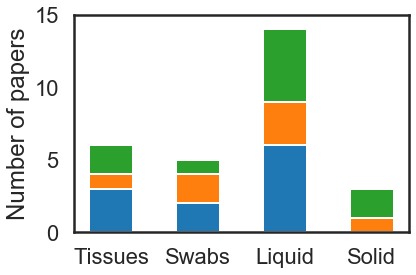

In [5]:
#N = 4
host = [3,2,6,0]
enrich = [1,2,3,1]
nope = [2,1,5,2]
position = [0,2,4,6]
BarWidth = 1

two_bottom = np.add(host, enrich)

#Host depletion
p1 = plt.bar(position, host, width=BarWidth)
#enrichment
p2 = plt.bar(position, enrich, width=BarWidth, bottom=host)
#Neither
p3 = plt.bar(position, nope, width=BarWidth, bottom=two_bottom)

#plt.figure(figsize=(10,8))
plt.ylabel('Number of papers')
plt.xticks(position, ('Tissues', 'Swabs', 'Liquid', 'Solid'))
plt.yticks(np.arange(0, 20, 5))
#plt.legend((p1[0], p2[0], p3[0]), ('Host-DNA depletion', 'Microbial enrichment', 'Neither'), loc='best', bbox_to_anchor=(1, 0.5))
#plt.xticks(rotation=90)
plt.savefig('../figures/b.png',bbox_inches='tight')

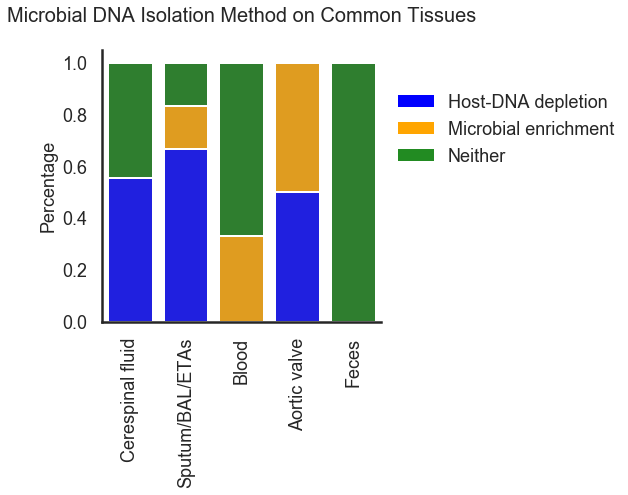

In [6]:
stacked_bar_data = pd.read_csv("../data/stack_bar.csv")

sns.set_style("white")
sns.set_context({"figure.figsize": (5, 5)})

#Plot 1 - background - "total" (top)
top_plot = sns.barplot(x = stacked_bar_data.tissues, y = stacked_bar_data.total, color = "forestgreen")

#Plot 2 - overlay - "medium" 
medium_plot = sns.barplot(x = stacked_bar_data.tissues, y = stacked_bar_data.host + stacked_bar_data.enrich, 
                          color = "orange")

#Plot3 - overlay - "bottom"
bottom_plot = sns.barplot(x = stacked_bar_data.tissues, y = stacked_bar_data.host, color = "blue")


topbar = plt.Rectangle((0,0),1,1,fc="forestgreen", edgecolor = 'none')
mediumbar = plt.Rectangle((0,0),1,1,fc='orange',  edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc="blue", edgecolor = 'none')
l = plt.legend([bottombar, mediumbar, topbar], ['Host-DNA depletion','Microbial enrichment','Neither'],
               bbox_to_anchor=(1, .9),prop={'size':18})
l.draw_frame(False)
plt.title("Microbial DNA Isolation Method on Common Tissues\n", fontsize = 20)

sns.despine()
bottom_plot.set_ylabel("Percentage")
bottom_plot.set_xlabel("")
plt.xticks(rotation=90)
#Set fonts to consistent size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] ):
    item.set_fontsize(18)
for items in (bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    items.set_fontsize(18)


plt.savefig('../figures/isolation.png', bbox_inches='tight', pad_inches=.5)

//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


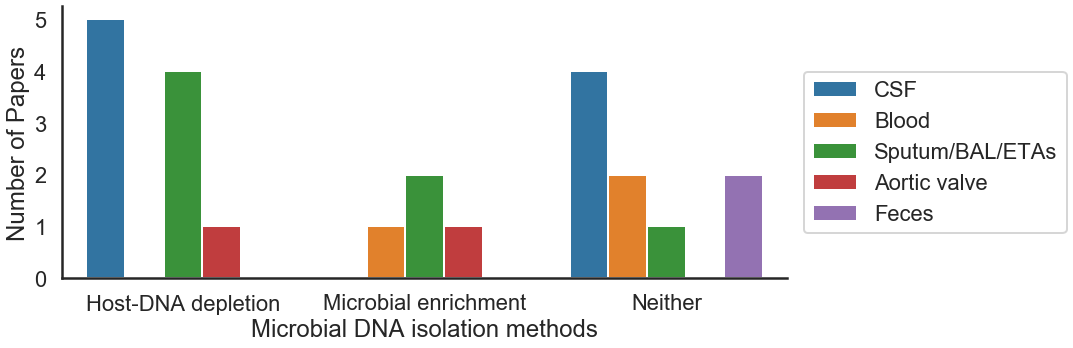

In [7]:
plt.figure(figsize=(13,5))
sns.set_style('white')
sns.set_context('poster')

samples = ['Host-DNA depletion','Microbial enrichment','Neither']
sample_df = pd.read_csv('../data/flag_tissue.csv')
          
cc_df = sample_df.loc[:, ['flag', 'Microbial isolation methods']]
cc_df['count'] = 'Exists'
#mf_df.head()
cc_group = cc_df.groupby(['Microbial isolation methods', 'flag'], as_index=False).count().rename(columns={'count':'count'})

g=sns.barplot(x='Microbial DNA isolation methods', y="count", hue="flag", data = sample_df)
g.set(ylabel = "Number of Papers")
plt.legend(loc='upper right',bbox_to_anchor=(1.4, 0.8))
g.set_xticklabels(rotation=0, labels = samples)
sns.despine()

plt.show()

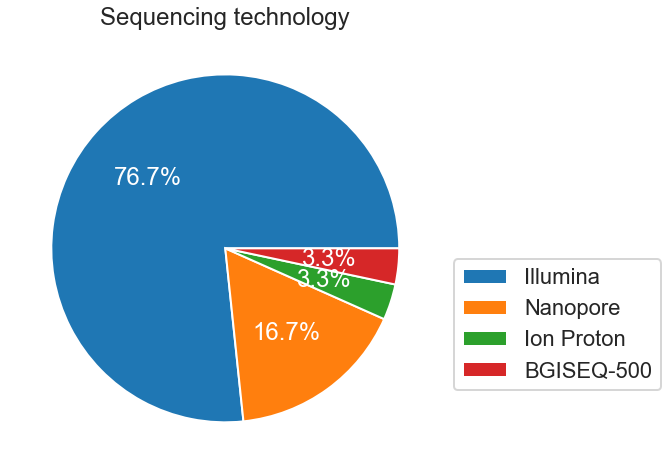

In [8]:
seq = pd.DataFrame({'Sequencing technology': [23, 5, 1,1]}, index=['Illumina', 'Nanopore', 'Ion Proton','BGISEQ-500']) 
plot = seq.plot.pie(y = 'Sequencing technology', figsize=(8,8),legend=None, autopct='%1.1f%%', textprops = {'color':"w"}) 
plt.legend(loc='best', bbox_to_anchor=(1, 0.5)) 
plt.ylabel("") 
plt.title("Sequencing technology") 
plt.savefig("../figures/c.png",bbox_inches='tight')

In [9]:
biot = pd.read_csv('../data/biotools.csv')
biot['bioinformatics tools'].value_counts()

BLAST                      10
MetaPhlAn2                  7
Bowtie2                     6
Kraken                      6
BWA                         6
Minimap2                    4
Canu                        4
CLARK                       3
SPAdes                      2
mlst                        2
mothur                      2
Prokka                      2
LMAT                        2
WIMP                        2
GSNAPL                      2
Snippy                      2
BioBloom                    2
ABRicate                    2
Pilon                       2
Porechop                    2
USEARCH                     2
cd-hit-dup                  2
UBLAST                      2
BBMap                       2
RepeatMasker                2
ESOM                        2
Geneious                    2
IDBA-UD                     2
SLURM                       1
MAFFT                       1
PRICE                       1
MIRA                        1
Plot2                       1
STAR      

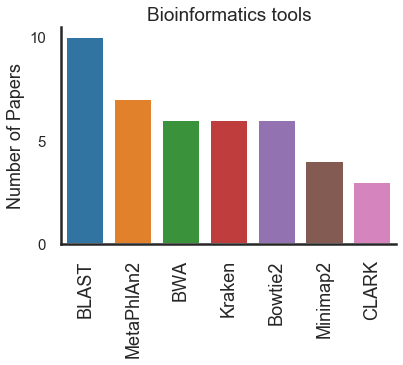

In [10]:
tool = pd.read_csv("../data/biotools_count.csv")
sns.set_style("white")
sns.set_context({"figure.figsize": (6, 4)})

sns.barplot(x=tool.tools, y=tool.Count)

plt.xlabel("")
plt.ylabel("Number of Papers", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=15)
plt.title("Bioinformatics tools",fontsize=19)
sns.despine()


plt.xticks(rotation=90,ha="center")
plt.savefig('../figures/e.png',bbox_inches='tight')

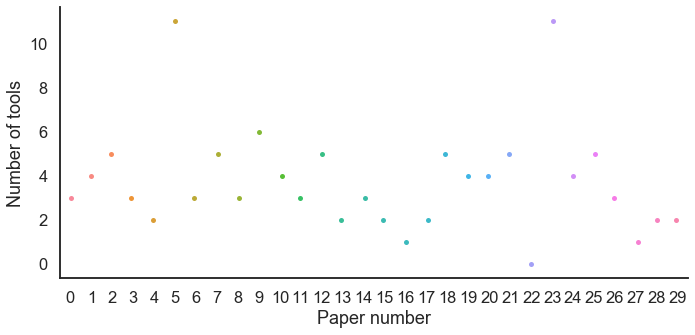

In [11]:
tl = pd.read_csv('../data/nm.of.tools.csv')
sns.set_style('white')
sns.set_context('talk')
ax = sns.catplot(data = tl, x = 'Paper number', y = 'Number of tools',aspect = 2)
sns.despine()
#plt.show()

In [12]:
dis = pd.read_csv('../data/disease.csv')
dis['disease'].value_counts()

Lower respiratory infections         8
Central nervous system infections    8
Prosthetic joint infections          3
Infective endocarditis               2
Polymicrobial infections             1
Bone and joint infections            1
Prosthetic Joint Infections          1
Name: disease, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

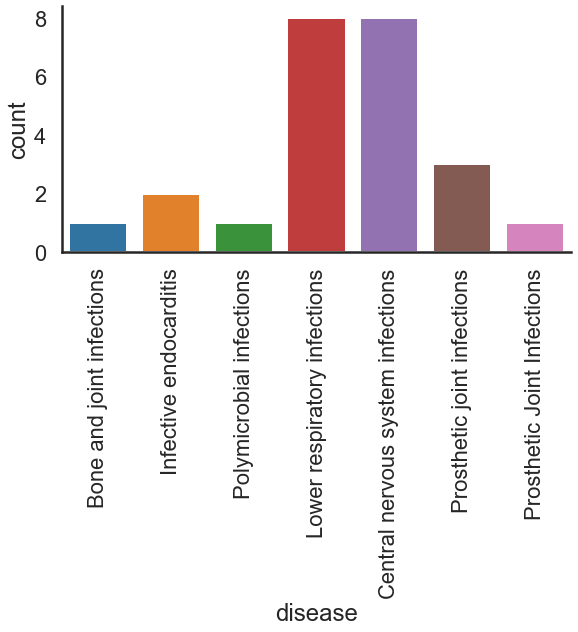

In [13]:
g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.catplot(x='disease',kind="count",data=dis,aspect=2)
plt.xticks(rotation=90)
#plt.savefig('../figures/disease_bar.png',bbox_inches='tight')

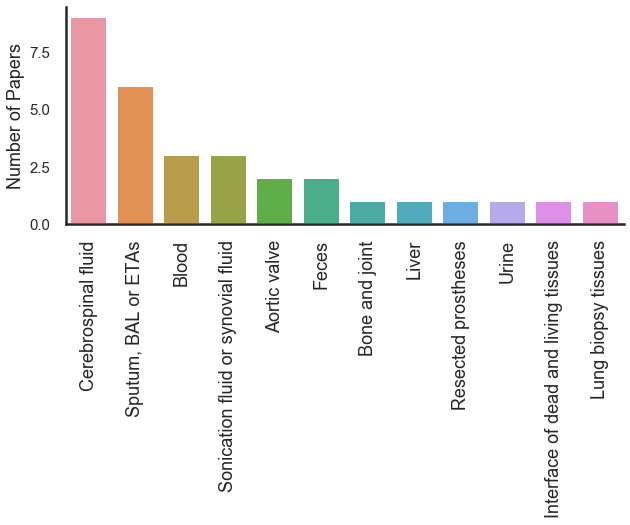

In [14]:
tissue = pd.read_csv("../data/tissue_count.csv")
sns.set_style("white")
sns.set_context({"figure.figsize": (10, 4)})

sns.barplot(x=tissue.tissues, y=tissue.nm)
g=sns.set_style("white")
g=sns.set_context("poster")

plt.xlabel("")
plt.ylabel("Number of Papers", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=15)
#plt.title("Tissue",fontsize=19)
sns.despine()
plt.xticks(rotation=90)
plt.savefig('../figures/tissue_count.png',bbox_inches='tight')

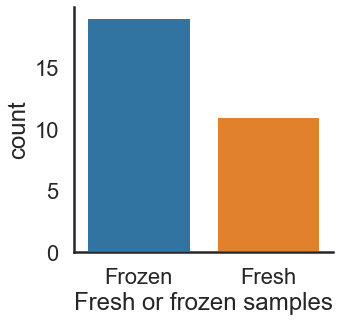

In [15]:
g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.catplot(x='Fresh or frozen samples',kind="count",data=df)
g=sns.despine()

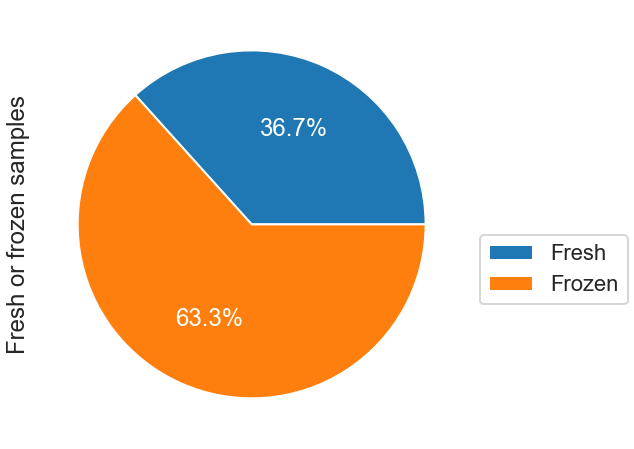

In [16]:
table = pd.DataFrame({'Fresh or frozen samples': [11,19]}, index=['Fresh','Frozen'])

plot = table.plot.pie(y = 'Fresh or frozen samples', figsize=(8,8),autopct='%1.1f%%', textprops = {'color':"w"})
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))

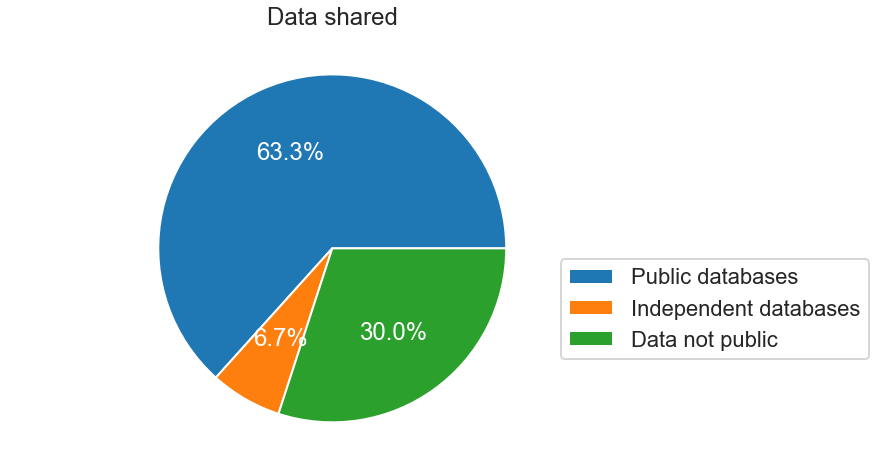

In [17]:
table = pd.DataFrame({'Data shared': [19,2,9]}, index=['Public databases','Independent databases','Data not public'])

plot = table.plot.pie(y = 'Data shared', figsize=(8,8),autopct='%1.1f%%', textprops = {'color':"w"})
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.ylabel("") 
plt.title("Data shared") 
plt.savefig("../figures/d.png",bbox_inches='tight')